# 纽约出租车搭乘数据分析

在纽约，出租车分为三类：Yellow、Green和FHV。本篇文章使用python对Green(绿色)出租车2017年1-6月的数据进行分析，探究绿色出租车的使用趋势，用户使用习惯等。

本次数据来源于网站http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml.

## 准备工作

In [1]:
#导入所需库、模块
import pandas as pd
import numpy as np
import time,datetime
import matplotlib.pyplot as plt

In [2]:
#导入2017年一月至六月的数据表
green_taxi1=pd.DataFrame(pd.read_csv('data/green_tripdata_2017-01.csv'))
green_taxi2=pd.DataFrame(pd.read_csv('data/green_tripdata_2017-02.csv'))
green_taxi3=pd.DataFrame(pd.read_csv('data/green_tripdata_2017-03.csv'))
green_taxi4=pd.DataFrame(pd.read_csv('data/green_tripdata_2017-04.csv'))
green_taxi5=pd.DataFrame(pd.read_csv('data/green_tripdata_2017-05.csv'))
green_taxi6=pd.DataFrame(pd.read_csv('data/green_tripdata_2017-06.csv'))

In [3]:
#利用append函数将几个月份的数据表进行拼接，组成完整的数据表
green_taxi=green_taxi1.append(green_taxi2,ignore_index=False)
green_taxi=green_taxi.append(green_taxi3,ignore_index=False)
green_taxi=green_taxi.append(green_taxi4,ignore_index=False)
green_taxi=green_taxi.append(green_taxi5,ignore_index=False)
green_taxi=green_taxi.append(green_taxi6,ignore_index=False)

In [4]:
#查看数据表前5行
green_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
1,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0
2,2,2017-01-01 00:04:02,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0
3,2,2017-01-01 00:01:40,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,2017-01-01 00:00:51,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1.0


In [5]:
#查看数据表维度
green_taxi.shape

(6369863, 19)

In [6]:
#查看缺失情况和数据类型
green_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6369863 entries, 0 to 976466
Data columns (total 19 columns):
VendorID                 int64
lpep_pickup_datetime     object
lpep_dropoff_datetime    object
store_and_fwd_flag       object
RatecodeID               int64
PULocationID             int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dtypes: float64(10), int64(6), object(3)
memory usage: 972.0+ MB


这里可以看到数据表共有6369863行、19列，数据保存完整，没有缺失值，接下来对数据进行分析及可视化。

## 不同月份出租车使用趋势

首先对green_taxi数据表字段进行处理，获取不同月份的使用情况和趋势。首先将数据表的载客时间段转化为日期格式，并将时间字段设置为索引。

In [7]:
#将载客时间字段更改为时间格式
green_taxi['lpep_pickup_datetime']=pd.to_datetime(green_taxi['lpep_pickup_datetime'])
#将载客时间字段设置为索引
green_taxi=green_taxi.set_index('lpep_pickup_datetime')

按月的维度对数据表中的数据进行汇总计数，并提取VendorID列作为每月Green TAXI的载客数量。

In [9]:
#按月对数据表进行汇总
monthy=green_taxi.resample('M',how=len)['VendorID']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


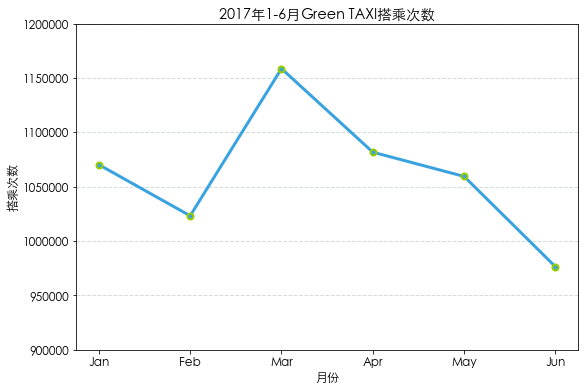

In [13]:
#将按月的green_taxi数据可视化展示

plt.rc('font', family='STXihei', size=12)

plt.figure(figsize=(9,6))
plt.xlabel('月份')
plt.ylabel('搭乘次数')
plt.title('2017年1-6月Green TAXI搭乘次数')
a=np.array([1,2,3,4,5,6])
plt.xticks(a,('Jan','Feb','Mar','Apr','May','Jun'))
plt.ylim(900000,1200000)
plt.plot(a,monthy,'go-',color='#39A2E1',linewidth=3,markeredgewidth=2,markeredgecolor='#99CC01')
plt.grid( color='#95a5a6',linestyle='--', linewidth=1 ,axis='y',alpha=0.4)
plt.show()

从折线图中可以看出，三月份出租车使用量最高，六月份的使用量最低，三至六月份使用量依次降低，不过从图中看不出具体的月份与搭乘次数的相关性。

## 24小时内出租车使用趋势

我们再来看下乘客在一天24小时中使用Green TAXI的情况。由于数据过大，小电脑有点运行不动吃不消啊，这里我们只使用了2017年1月的单月数据进行分析。

In [14]:
#对载客时间进行分列，提取载客的小时数据
time_split = pd.DataFrame((x.split(' ') for x in green_taxi1.lpep_pickup_datetime),index=green_taxi1.index,columns=['pickup_date','pickup_time'])
 
#将分列后的时间字段与原始数据表合并
green_taxi1=pd.merge(green_taxi1,time_split,right_index=True, left_index=True)
 
#对合并后的数据表中的时间字段更改为时间格式
green_taxi1['pickup_time']=pd.to_datetime(green_taxi1['pickup_time'])
 
#将时间字段设置为数据表的索引字段
green_taxi1 = green_taxi1.set_index('pickup_time')
 
#按小时对数据表进行计算汇总
pickup_time=green_taxi1.resample('H',how=len)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


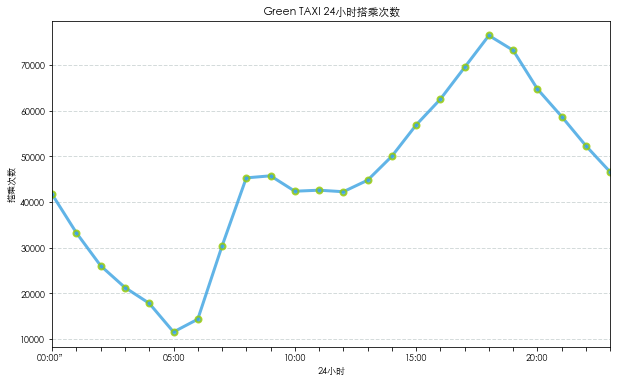

In [15]:
#绘制24小时载客趋势图
plt.figure(figsize=(10,6))
plt.rc('font', family='STXihei', size=9)
a=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.plot(a,pickup_time['VendorID'],'go-',color='#39A2E1',linewidth=3,markeredgewidth=2,markeredgecolor='#99CC01',alpha=0.8)
plt.xlabel('24小时')
plt.ylabel('搭乘次数')
plt.title('Green TAXI 24小时搭乘次数')

plt.grid( color='#95a5a6',linestyle='--', linewidth=1 ,axis='y',alpha=0.4)
plt.xlim(0,23)
plt.xticks(a,('00:00”','','','','','05:00','','','','','10:00','','','','','15:00','','','','','20:00','','',''))

plt.show()

从24小时搭乘趋势图得出如下结论：
* Green TAXI的使用呈现两个高峰，分别为07:00-09:00和16:00-19:00，应该是处于上班和下班的时间点；
* 整体来说，每日晚间是Green TAXI的使用高峰，晚间的出租车使用量明显高于早间，并且延续时间较长；
* 凌晨05:00左右的时候，出租车使用量降至最低，这个时间点大家应该都在梦乡之中了；
* 05:00-18:00时搭乘次数整体呈现上升趋势，剩余的时间内呈现下降趋势。

## 乘客叫车方式偏好

Green TAXI有两种不同的叫车方式，数据表中的Trip_type字段代表了乘客召唤出租车的方式，编号1代表Street-hail、2代表Dispatch，接下来研究乘客对两种不同的叫车方式选择偏好。

In [16]:
#我们按Trip_type字段对数据进行汇总
trip_type=green_taxi.groupby('trip_type')['trip_type'].count()

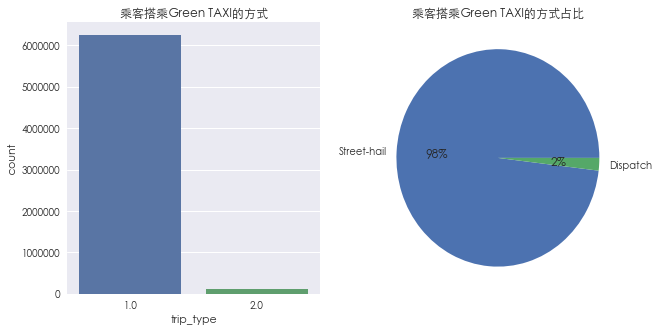

In [17]:
#绘制汇总乘客叫车方式的分布图
import seaborn as sns
plt.rc('font', family='STXihei', size=12)
#设置图片大小
plt.figure(figsize = (10,5))
plt.subplot(121)
#设置柱状图显示不同叫车方式使用次数
sns.countplot(x='trip_type', data=green_taxi)
#设置标题
plt.title('乘客搭乘Green TAXI的方式')
plt.subplot(122)
#绘制饼图展示不同叫车方式所占比例
plt.pie(trip_type,labels=['Street-hail','Dispatch'],autopct='%1.0f%%')
#设置标题
plt.title('乘客搭乘Green TAXI的方式占比') 
plt.show()

从图表中看到，Street-hail即乘客在路边召唤出租车的方式是最主要的叫车方式,Dispatch这类通过调度方式叫车的数量非常少。不过这里数据中没有显示其他的叫车方式，不排出乘客选择其他方式。

## 乘客数量分布

Green TAXI 的车型分为四种，根据用途和载客数量不同从小到大分布为Sedan，Town car，Minivan和SUV。下面我们来看下搭乘Green TAXI的乘客数量分布。换句话说就是每次搭乘时出租车内的人数。

In [18]:
#查看每次载客的乘客数量分布
green_taxi['passenger_count'].min(),green_taxi['passenger_count'].max()

(0, 9)

查看Passenger_count的最大值和最小值，可以看出范围是0-9个人得到乘客数量范围，接下来我们对数据表按Passenger_count字段进行汇总计数，并绘制乘客人数分布图。

In [19]:
#按乘客数量对数据进行计数汇总
passenger=green_taxi.groupby('passenger_count')['passenger_count'].count()

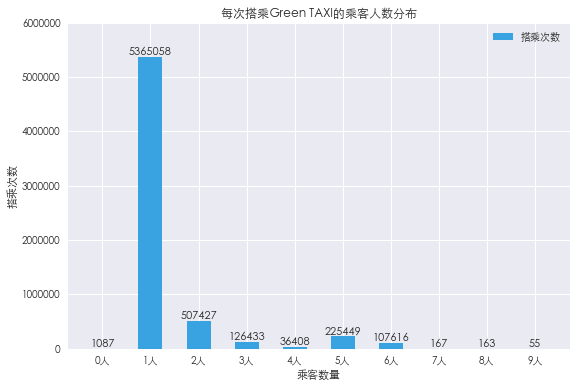

In [20]:
#设置图片大小
plt.figure(figsize=(9,6))
a=np.array([0,1,2,3,4,5,6,7,8,9])
plt.bar(a,passenger,align='center',color='#39A2E1',width = 0.5)
#设置x轴标签
plt.xlabel('乘客数量')
#设置y轴标签
plt.ylabel('搭乘次数')
#设置标题
plt.title('每次搭乘Green TAXI的乘客人数分布')
#设置图例
plt.legend(['搭乘次数'], loc='upper right')
#设置x轴刻度
plt.xticks(a,('0人','1人','2人','3人','4人', '5人','6人','7人','8人','9人'))
#设置数据标签
x=a
y=passenger
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
#设置y轴刻度范围
plt.ylim(0,6000000)
plt.show()

可以得出以下结论：

* 载客范围是0-9个人。
* 可以0人搭乘的竟然有1087次，推测莫非是约车的时候打表来接的，然后又取消了订单？
* 独自1人搭乘出租车的数量最多，其次为2人，5人，3人和2人，像7人及以上的比较少，推测搭乘的这种出租车型为SUV。

## 支付方式分布

Green TAXI数据表中对乘客支付车费的方式分为了5类，通过对应文档分别为Credit card、Cash、No charge、Dispute、Unknown。

接下来首先将支付方式的编号还原为具体的类别名称，然后按支付方式的名称字段对数据表进行计数汇总。

In [21]:
#对数据表中的支付方式进行标注
bins = [0, 1, 2, 3, 4, 5]
group_payment = ['Credit card', ' Cash', ' No charge', 'Dispute', 'Unknown']
green_taxi['group_payment'] = pd.cut(green_taxi['payment_type'], bins, labels=group_payment)

#按支付方式的名称字段对数据表进行计数汇总
payment_type=green_taxi.groupby('group_payment')['group_payment'].agg(len)

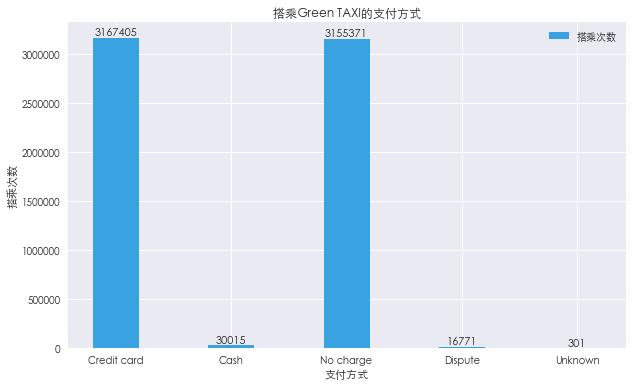

In [22]:
#对汇总后的支付方式数据汇总进行可视化分析
plt.rc('font', family='STXihei', size=15)
plt.figure(figsize=(10,6))
a=np.array([1,2,3,4,5])
plt.bar([1,2,3,4,5],payment_type,align='center',color='#39A2E1',width=0.4)
#设置x轴标签
plt.xlabel('支付方式')
#设置y轴标签
plt.ylabel('搭乘次数')
#设置标题
plt.title('搭乘Green TAXI的支付方式')
#设置图例
plt.legend(['搭乘次数'], loc='upper right')
#设置x轴刻度
plt.xticks(a,('Credit card','Cash','No charge','Dispute', 'Unknown'))
x=[1,2,3,4,5]
y=payment_type
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.show()

在所有的支付方式中，现金和信用卡是乘客使用最多的支付方式。其他的情况都很少见。果然如同大家的常识，国外目前信用卡和现金支付是主流支付方式啊，不像咱们的支付宝、微信支付方便快捷呀，不得不为此点个赞。

## 平均搭乘距离及里程分布

首先来看下乘客搭乘出租车trip_distance的平均距离及搭乘的距离范围。

使用mean函数查看平均距离为2.62英里，min和max函数查看乘客搭乘距离范围为(0,183.5)英里。

In [23]:
#查看乘客平均乘坐距离
green_taxi['trip_distance'].mean()

2.6249238939669204

In [24]:
#查看乘客的搭乘距离范围
green_taxi['trip_distance'].min(),green_taxi['trip_distance'].max()

(0.0, 183.5)

对乘客搭乘距离进行分组。

In [25]:
#利用cut函数对乘客乘车距离进行分组
bins = [0, 5, 10, 50, 100, 200]
group_distance = ['0-5 mile', '5-10 mile', '10-50 mile', '50-100 mile', '100-200 mile']
green_taxi['group_distance']=pd.cut(green_taxi['trip_distance'],bins,labels=group_distance)

按划分后的距离分组字段group_distance对数据表进行计数汇总，查看乘客搭乘的距离分布情况。

In [26]:
#roup_distance对数据表进行计数汇总
group_trip_distance=green_taxi.groupby('group_distance')['trip_distance'].count()

将乘客搭乘的距离分布数据进行可视化分析。

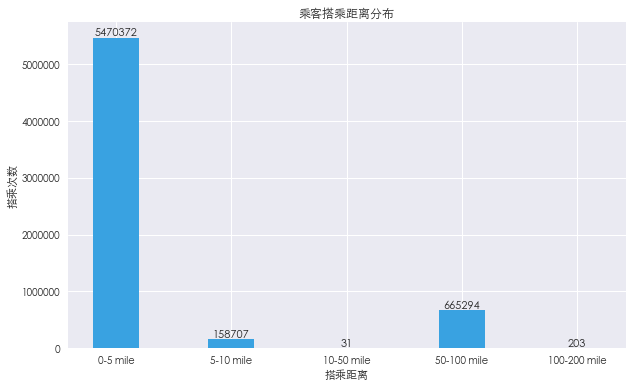

In [27]:
#设置图片大小
plt.figure(figsize=(10,6))
a=np.array([1,2,3,4,5])
plt.bar([1,2,3,4,5],group_trip_distance,width=0.4,color='#39A2E1',align='center')
plt.title('乘客搭乘距离分布')
plt.ylabel('搭乘次数')
plt.xlabel('搭乘距离')
plt.xticks(a,group_distance)
#设置数据标签
x=a
y=group_trip_distance
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.show()

从乘客搭乘距离分布图上来看，0-5英里短途的数量最多，其次是50-100英里，搭乘超过100英里的长途出租车比较少，比较长途出租车还是比较贵的，一般人坐不起呀。目前暂时没有在搭乘距离和搭乘次数之间发现明显的规律。

## 总结

我们使用Python的pandas和matplotlib包对纽约出租车搭乘数据进行简单的分析，得出以下结论：
* 三月份出租车使用量最高，六月份的使用量最低，三至六月份出租车使用量依次降低。
* Green TAXI的使用呈现两个高峰，分别为07:00-09:00和16:00-19:00，应该是处于上班和下班的时间点。05:00左右时出租车使用量最低。整体来看，晚间的出租车使用量明显高于早间，并且延续时间较长。
* Street-hail即乘客在路边召唤出租车的方式是最主要的叫车方式,而Dispatch这类通过调度方式叫车的数量非常少。
* 出租车搭乘人数范围为0-9人，独自1人搭乘出租车的数量最多，其次为2人，5人，3人和2人，像7人及以上的比较少，推测搭乘的这种出租车型为SUV。
* 所有的支付方式中，现金和信用卡是乘客使用最多的支付方式，其他支付方式非常少。
* 乘客平均搭乘距离为2.6英里，0-5英里短途的数量最多，其次是50-100英里，搭乘超过100英里的长途出租车数量比较少。